# 6.1 Credit Risk Scoring Project
The project for this week is credit risk scoring. So imagine that you want buy a mobile phone. So you go to your bank and want to get a loan to buy a new mobile phone. You fill in some application form that asks some information about you (income, price of phone, how much money you need as loan) and send it to the bank. The bank evaluates this and score you and give you the answer 'yes' or 'no'.
What we want to do in this chapter is to build a model that the bank can use to make the decision if they should lend the money or not. The bank can give information about you to the model, and the response is a risk score that this customer is not going to pay back. In other words the model will return the probability or risk that this customer is going to default. The bank can use this service to make a decision to lend the money to the customer or not.
The way we can do this is, to analyze all the customers with their specific applications we have (based on historical data). For each of these cases we know for how much money they asked and whether they were able to pay back the loan or not.

Example:
Customer A --> OK
Customer B --> OK
Customer C --> DEFAULT
Customer D --> DEFAULT
Customer E --> OK

So what we have here is a binary classification problem where yi € {0,1}.  0-OK, 1-DEFAULT
We want to train a model that for each new customer gives us the probability that this customer is going to default:
g(xi) --> PROB OF DEFAULT

We have X which are all the information about the customer, we have the target variable y which is the default probability.

Dataset: https://github.com/gastonstat/CreditScoring
Status is if they defaulted or not.


In [268]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 6.2 Data cleaning and preparation
- Downloading the dataset
- Re-encoding the categorical variables
- Doing the train/validation/test split


In [2]:
data = 'https://github.com/gastonstat/CreditScoring/blob/master/CreditScoring.csv'

In [3]:
!wget $data

--2023-10-08 19:13:49--  https://github.com/gastonstat/CreditScoring/blob/master/CreditScoring.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321064 (314K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 313,54K  --.-KB/s    in 0,09s   

2023-10-08 19:13:50 (3,24 MB/s) - ‘CreditScoring.csv’ saved [321064/321064]



In [4]:
# this is the same function as we saw in case of pandas dataframe but for text files
!head CreditScoring.csv

{"payload":{"allShortcutsEnabled":false,"fileTree":{"":{"items":[{"name":"CleanCreditScoring.csv","path":"CleanCreditScoring.csv","contentType":"file"},{"name":"CreditScoring.csv","path":"CreditScoring.csv","contentType":"file"},{"name":"Part1_CredScoring_Processing.R","path":"Part1_CredScoring_Processing.R","contentType":"file"},{"name":"Part2_CredScoring_Profiling.R","path":"Part2_CredScoring_Profiling.R","contentType":"file"},{"name":"Part3_CredScoring_PCA.R","path":"Part3_CredScoring_PCA.R","contentType":"file"},{"name":"Part4_CredScoring_MCA.R","path":"Part4_CredScoring_MCA.R","contentType":"file"},{"name":"Part5_CredScoring_Clustering.R","path":"Part5_CredScoring_Clustering.R","contentType":"file"},{"name":"Part6_CredScoring_DecisionTrees.R","path":"Part6_CredScoring_DecisionTrees.R","contentType":"file"},{"name":"Part7_CredScoring_Logistic.R","path":"Part7_CredScoring_Logistic.R","contentType":"file"},{"name":"README.md","path":"README.md","contentType":"file"}],"totalCount":10}

1","3","60","62","12000","0","1000","1627"],["2","3","6","60","21","1","1","1","35","146","0","0","1400","1646"],["2","0","1","60","19","1","1","1","35","0","0","0","1200","1503"],["1","17","1","48","36","2","1","1","56","105","0","0","1000","1295"],["2","8","6","36","30","2","2","3","75","100","4000","1365","1220","1745"],["1","10","2","24","45","4","1","1","35","77","14000","0","200","300"],["2","10","6","36","44","2","2","3","75","0","0","0","1300","2276"],["1","15","2","60","39","4","1","3","45","54","7000","0","1500","2230"],["2","0","6","60","27","1","1","1","35","149","0","0","1500","1601"],["1","8","6","48","24","2","1","1","45","56","0","0","770","1129"],["1","17","2","48","43","2","1","1","75","251","5500","0","1100","1664"],["2","0","2","60","34","2","1","2","75","65","5000","0","1000","1142"],["2","0","2","48","21","1","1","2","60","160","2500","0","1220","1598"],["1","37","2","60","56","3","1","1","35","300","10000","0","1300","1750"],["2","0","6","42","23","1","1","2","35

,"10","2","24","50","2","1","3","60","200","99999999","0","500","1131"],["1","10","2","60","32","2","1","1","60","160","4000","1800","1050","1303"],["2","2","2","60","30","2","2","3","45","0","5000","700","1000","2200"],["1","16","2","60","32","2","1","1","60","159","4000","0","1500","1736"],["2","0","1","60","19","1","1","4","35","0","0","0","900","1158"],["1","10","2","6","39","2","1","3","75","67","8000","0","430","500"],["2","9","6","60","30","2","2","1","60","109","0","0","1250","1560"],["2","7","6","36","38","2","2","3","35","59","0","0","1000","2246"],["1","3","5","36","28","1","1","1","35","74","0","0","350","550"],["1","6","2","48","51","2","1","3","45","106","12000","0","1035","1410"],["2","0","5","48","21","1","1","2","35","48","0","0","1850","1877"],["2","3","5","60","23","1","1","1","35","62","0","0","1100","1300"],["1","1","2","24","39","2","1","4","35","70","4000","0","525","1771"],["2","3","1","36","39","2","1","1","90","150","0","0","300","700"],["1","12","2","48","39"

In [15]:
#df = pd.read_csv(data)
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


What we see here that for some of the categorical variables like status, home, marital, records, job. They are categorical variables but they are encoded as numbers which is not very nice. We want them to contain text to understand what this 1, 2, ... might tell us.
First let us lowercase the column names.

In [16]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Now we need to figure out what to do with these categorical variables. By the way there is an R file in the repository with information how to pre-process this data. What we see there is that there are some missing values. Missing values are encoded as bunch of nines. So we need to do sth. with them.
There are also information about the categorical variables, f.e. the status encodes 'good' and 'bad'. In R an array starts with index 1, so 'good' equals 1 and 'bad' equals 2. In case of home we have ('rent', 'owner', 'priv', 'ignore','parents', and 'other'). In case of marital we have ('single', 'married', 'widow', 'separated', and 'divorced'). In case of Records there is ('yes' and 'no') and in case ob job we have ('fixed', 'partime', 'freelance', and 'other'). Now we need to translate the numbers back to strings.

In [17]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [18]:
# using the map method
# it takes in a dictionary where we map every value from the original dataframe to some new value
status_values = {
    1: 'ok', 
    2: 'default', 
    0: 'unk'
}
df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [20]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)

marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
df.records = df.records.map(records_values)

job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


Now we have all categrorical variables nicely decoded back to strings.
Let's look now at the missing values.

In [22]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


We see here that income, assets, and debt has these large numbers (99999999.0) as max values.
What we can do now is, we can replace these numbers.
Let's look how to replace this values.

In [25]:
df.income.max()
# Output: 99999999

df.income.replace(to_replace=99999999, value=np.nan)

df.income.replace(to_replace=99999999, value=np.nan).max()
# Output: 959.0

959.0

Let's do this in a loop for all three columns

In [26]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Remember there are zeros (meaning missing values) in the status column. Let's look at this again.

In [27]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

This one record is useless for us, we don't know what to do with this, because we're only interested in 'ok' and 'default' values. So we can simply remove this record. 

In [29]:
df = df[df.status != 'unk'].reset_index(drop=True)
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


## Doing the train/validation/test split 

Last thing we wanted to do here is train/validation/test split

In [33]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
df_train.status

0       default
1       default
2            ok
3       default
4            ok
         ...   
2667         ok
2668         ok
2669         ok
2670         ok
2671         ok
Name: status, Length: 2672, dtype: object

We want to turn our target variable into a number

In [35]:
(df_train.status == 'default').astype('int')

0       1
1       1
2       0
3       1
4       0
       ..
2667    0
2668    0
2669    0
2670    0
2671    0
Name: status, Length: 2672, dtype: int64

In [37]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [39]:
del df_train['status']
del df_val['status']
del df_test['status']

In [40]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


# 6.3 Decision trees
- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

This time we want to use the ready-to-use data set from the last article to predict if customers are going to default or not. We want to use decision trees for that.

A decision tree is a data structure where we have a node which is the condition. And from this node there is one arrow to the left (condition = false) and one to the right (condition=true). Then there is the next condition which can be true or false. ... until there is the final decision 'OK' or 'DEFAULT'

                                          RECORDS = "YES"
                                    FALSE                TRUE
                                ASSETS > 6,000       JOB = "PARTTIME"
                             FALSE        TRUE      FALSE        TRUE
                             DEFAULT       OK        OK          DEFAULT
                             

In [41]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else: 
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [43]:
# just take one record to test
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [44]:
assess_risk(xi)

'ok'

These rules can be learned from the data using the decision tree algorithm

In [58]:
from sklearn.tree import DecisionTreeClassifier
# because we have categorical variables we need to import DictVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [52]:
# Now we need to turn our training dataframe into a list of dictionaries
# then turn this list of dictionaries into the feature matrix
# After that we train the model

# This will lead us later to an error
#train_dicts = df_train.to_dict(orient='records')
train_dicts = df_train.fillna(0).to_dict(orient='records')
train_dicts[:5]
# Output:
#[{'seniority': 10,
#  'home': 'owner',
#  'time': 36,
#  'age': 36,
#  'marital': 'married',
#  'records': 'no',
#  'job': 'freelance',
#  'expenses': 75,
#  'income': 0.0,
#  'assets': 10000.0,
#  'debt': 0.0,
#  'amount': 1000,
#  'price': 1400},
# {'seniority': 6,
#  'home': 'parents',
#  'time': 48,
#  'age': 32,
#  'marital': 'single',
#  'records': 'yes',
#  'job': 'fixed',
#  'expenses': 35,
#  'income': 85.0,
#  'assets': 0.0,
#  'debt': 0.0,
#  'amount': 1100,
#  'price': 1330},
# {'seniority': 1,
#  'home': 'parents',
#  'time': 48,
#  'age': 40,
#  'marital': 'married',
#  'records': 'no',
#  'job': 'fixed',
#  'expenses': 75,
#  'income': 121.0,
#  'assets': 0.0,
#  'debt': 0.0,
#  'amount': 1320,
#  'price': 1600},
# {'seniority': 1,
#  'home': 'parents',
#  'time': 48,
#  'age': 23,
#  'marital': 'single',
#  'records': 'no',
#  'job': 'partime',
#  'expenses': 35,
#  'income': 72.0,
#  'assets': 0.0,
#  'debt': 0.0,
#  'amount': 1078,
#  'price': 1079},
# {'seniority': 5,
#  'home': 'owner',
#  'time': 36,
#  'age': 46,
#  'marital': 'married',
#  'records': 'no',
#  'job': 'freelance',
#  'expenses': 60,
#  'income': 100.0,
#  'assets': 4000.0,
#  'debt': 0.0,
#  'amount': 1100,
#  'price': 1897}]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'm

In [53]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [54]:
# All the numerical features are left intact, but we have encoding for categorical features.
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:, 1]

In [66]:
roc_auc_score(y_val, y_pred)

0.6547098641350415

In [68]:
# 0.65 is not really a great value, let's look at training data and calulate auc score.
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

This is called overfitting. Overfitting is when our model simply memorizes the data, but it memorizes in such a way that when it sees a new example it doesn't know what to do with this example. So it memorizes the training data but it fails to generalize. The reason why this happens to decision trees it that the model creates a specific rule for each example. That works fine for training data, but it doesn't work for any unseen example.
The reason why this can happens is, that we let the tree grow too deep.
If we restrict the tree to only grow up to three levels deep, the tree will learn rules that are less specific.

In [69]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [70]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)

train 0.7761016984958594
val 0.7389079944782155


### Decision Stump 

If we restrict the depth to 3, the model performance on validation is significantly better. It's now 74% compared to 65%. By the way a decistion tree with a depth of 1 is called DECISION STUMP. It's not really a tree, because this is only one condition.

In [71]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)

train 0.6282660131823559
val 0.6058644740984719


This decision stump is only a bit worse than the overfitted one. Let's look at this tree to see the rules it learns. For that we can use a special function to visualize trees.

In [79]:
from sklearn.tree import export_text

In [74]:
print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- class: 1
|--- feature_25 >  0.50
|   |--- class: 0



To know what "feature_25" means, we need to use the DictVectorizer feature names dictionary.

In [95]:
# in the video Alexey uses print(export_text(dt, feature_names=dv.get_feature_names()))
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=no <= 0.50
|   |--- class: 1
|--- records=no >  0.50
|   |--- class: 0



This means if there are records (records=no <= 0.50) then it's DEFAULT.
If there are no records (records=no > 0.50) then is's OK.
So remember one-hot encoding is used here and there is the column named records="NO" which is either 0 (is when it's not "no") or 1 (is when it's "no").

### Decision tree with depth of 2 

In [96]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)

train 0.7054989859726213
val 0.6685264343319367


Even two levels in a decision tree already performs better than the overfitted one.

In [97]:
print(export_text(dt))

|--- feature_26 <= 0.50
|   |--- feature_16 <= 0.50
|   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- class: 1
|--- feature_26 >  0.50
|   |--- feature_27 <= 6.50
|   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- class: 0



In [98]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



# 6.4 Decision tree learning algorithm
- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

Now we want to see how a decision tree can come up with rules like we saw in the last article.
Here we talk about a decision stump, which is a decision tree with just one level.

                                                   CONDITION "NODE"
                                             that have a condition inside
                                                     FEATURE > T 
                                             
                                               FALSE             TRUE
    DECISION NODES (often called LEAVES):     DEFAULT             OK
    
Decision nodes is where the tree doesn't go deeper. This is where we make a decision.
To illustrate how the learning algorithm looks like let's use a simple data set.

In [269]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


What we want to do now is, we want to use this numerical column 'assets' in our training. We want to train a decision tree using this column. So we want to train a model based on the condition ASSETS > T
The question is: What is the best T? So what is the best split?
We want to split the dataset into two parts. One part where the condition holds true.

                                               DF
                                           ASSETS > T
                                      FALSE           TRUE
                                     DF_LEFT         DF_RIGHT

DF_RIGHT is where this condition is true, so for all records where assets is greater than T.
DF_LEFT is where this condition is false, so for all records where assets is not greater than T.

This is called splitting, so we're splitting the data set into two parts where it's true and where it's false.

What we can do now is sorting the data by the 'assets' column.

In [270]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


So we want to come up with a rule "ASSETS > T" so what are the possibilities. So "T" works as a threshold here.
- T = 2000      (ASSETS<=2000 becomes LEFT, ASSETS>2000 becomes RIGHT)
- T = 3000
- T = 4000
- T = 5000
- T = 8000
In case of T=9000 there will be nothing on the right so this splitting makes no sense. In the same way we also don't need T = 0 (in this case there will be nothing on the left side)

In [273]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

For each of these Ts we want to cut our data set into LEFT and RIGHT and see which split is the best one

In [274]:
from IPython.display import display

In [280]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    display(df_right)

    print()

0


,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



2000


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



3000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok



4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok



5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok



8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


Now we have a lot of splits across all the thresholds, so now we need to know which split is the best.
For evaluating that we have different (split) evaluation criteria.
Let's use an example T=4000
We see that on the LEFT we have 3xDEFAULT and 1xOK and on the RIGHT we have 3xOK and 1xDEFAULT

In [277]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
display(df_right)

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


                                        ASSETS>4000
                                   FALSE          TRUE
                                   DEFAULT         OK
 
To understand how good our predictions are we can look at misclassification rate. Misclassification rate is when we look at LEFT and predict everyone as DEFAULT here, how many errors we make. So what is the fraction of errors here.

    LEFT: 3xDEFAULT, 1xOK    --> predicting everthing as DEFAULT --> misclassification rate = 1/4 = 25%
    RIGHT:3xOK, 1xDEFAULT    --> predicting everthing as OK      --> misclassification rate = 1/4 = 25%
    
This is how we can evaluate the quality of our split. Fot T=4000 we can take the average and come to an average misclassification rate of 25%. We don't have to take the average, we can also take weighted average (especially useful when there are much more examples on one side than on the other side).
We can print the normalized value counts as shown in the next snippet.

In [278]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


default    0.75
ok         0.25
Name: status, dtype: float64


In [281]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



The misclassification rate is just one way of measuring impurity. We want our leaves as pure as possible. The misclassification rate tells us how impure they are. There are also other ways of measuring impurity.

     T          Decision LEFT          Impurity LEFT          Decision RIGHT          Impurity RIGHT          AVG
     0              DEFAULT                  0%                     OK                      43%               21%
    2000            DEFAULT                  0%                     OK                      33%               16%
    --------------------------------------------------------------------------------------------------------------
    3000            DEFAULT                  0%                     OK                      20%               10%
    --------------------------------------------------------------------------------------------------------------
    4000            DEFAULT                 25%                     OK                      25%               25%
    5000            DEFAULT                 50%                     OK                      50%               50%
    8000            DEFAULT                 43%                     OK                      0%                21%
    
We see the split where T = 3000 has the lowest avg misclassification rate. Best impurity is 10%.
This is how we find the best split if we only have one column.
So what did we do:
- sort the data set
- find all the possible thresholds
- for each of the thresholds we split the data set
- for each split we calculate the impurity on the LEFT and on the RIGHT
- then we compute the avg impurity
- from all the splits we looked at the avg impurity and selected the lowest one

The tree we have learned looks like this:

                                        ASSETS>3000
                                   FALSE          TRUE
                                   DEFAULT         OK
                                   
Let's see what happens when we have two features. For that let's add a 'debt' feature. 'debt' means how much debt the clients have.

In [282]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


We already tried splitting by the assets feature. Let's see what happens if we try to split by the debt feature.

In [283]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


Possible thresholds:
- T = 500      (DEBT<=500 becomes LEFT, DEBT>500 becomes RIGHT)
- T = 1000
- T = 2000

So we saw how it works for only one feature. Let's generalize a bit and put both thresholds in a dictionary. If there are more features we can put the thresholds here as well.

In [284]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [285]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

#####################


We calculate the table for assets already, let's do this also for debt.

ASSETS:

     T          Decision LEFT          Impurity LEFT          Decision RIGHT          Impurity RIGHT          AVG
     0              DEFAULT                  0%                     OK                      43%               21%
    2000            DEFAULT                  0%                     OK                      33%               16%
    --------------------------------------------------------------------------------------------------------------
    3000            DEFAULT                  0%                     OK                      20%               10%
    --------------------------------------------------------------------------------------------------------------
    4000            DEFAULT                 25%                     OK                      25%               25%
    5000            DEFAULT                 50%                     OK                      50%               50%
    8000            DEFAULT                 43%                     OK                      0%                21%
    
DEBT:    

     T          Decision LEFT          Impurity LEFT          Decision RIGHT          Impurity RIGHT          AVG   
    500              OK                     0%                    DEFAULT                   43%               21%
    1000             OK                     33%                   DEFAULT                   0%                16%
    2000             OK                     43%                   DEFAULT                   0%                21%
    
We see that debt is not as useful for making the split as the assets. The best split overall is the same split than before ASSETS>3000. For 3 features it would be another group in the table with another bunch of rows with another variable.

FINDING THE BEST SPLIT ALGORITHM FOR MULTIPLE FEATURES:

                    FOR F IN FEATURES:
                        FIND ALL THRESHOLDS FOR F
                        FOR T IN THRESHOLDS:
                            SPLIT DATASET USING "F>T" CONDITION
                            COMPUTE THE IMPURITY OF THIS SPLIT
                    SELECT THE CONDITION WITH THE LOWEST IMPURITY

We maybe need to have some stopping criteria. So we recursively apply the splitting but how do we know when to stop?

STOPPING CRITERIA
- group is already pure 
  (further splitting wouldn't make sense, because after splitting both side predict the same result)
- tree reached depth limit
- group is too small to split

When we use this criteria, we force our model to be simpler and this way we prevent it from overfitting.

Let's summarize the decision tree learning algorithm:

                                    DECISION TREE LEARNING ALGORITHM
                                    
                           - FIND THE BEST SPLIT
                           - STOP IF MAX_DEPTH IS REACHED
                           - IF LEFT IS SUFFICIENTLY LARGE AND LEFT IS NOT PURE:
                               --> REPEAT FOR LEFT
                           - IF RIGHT IS SUFFICIENTLY LARGE AND RIGHT IS NOT PURE:
                               --> REPEAT FOR RIGHT

For learning more on decision trees go to scikit-learn website (scikit-learn.org/stable/modules/trees.html).
There is an interesting thing under "Classification criteria". "Misclassification" is what we used as a way of measuring impurity. There are other ones like "Entropy" and "Gini".

Decision trees can also be used for solving regression problems.

# 6.5 Decision trees parameter tuning

- selecting max_depth
- selecting min_samples_leaf

Now we want to tune the parameters. By tuning we mean selecting parameters in such a way that the performance (the auc of this model or whatever other metric) is maximized/minimized depending on the metric. In our case of auc we try to maximize auc on the validation set and we try to find such parameters that the score on validation is maximized.

Let's look at the parameters of DecisionTreeClassifier. There are quite a few parameters:
- criterion - refers to impurity measure
- max_depth - controls the size of the tree
- min_samples_leaf - controls the size of a leaf (= decision node where we actually make the decision)
  --> That means how many samples/observations we want to have in each leaf (= basically the size of a group)
  
First we want to improve "max_depth" and after that we can improve the other parameters. So let's train many different decision trees with different values for max_depth.

In [299]:
# None means no restriction --> tree should grow as deep as possible / have as many layers as possible
# --> We already know what happens when we don't restrict it but leave it for comparison purpose.
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    # remember we need the column with negative scores
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.760
  10 -> 0.706
  15 -> 0.663
  20 -> 0.654
None -> 0.657


What we can see here is that the best values seems to be around 76% for max_depth equal to 4, 5, and 6. So that means our best tree should have from 4 to 6 layers. If there wouldn't be any other parameter we could go with depth of 4, because the tree is a bit simpler (4 layers instead of 5 layers). Easier to read, easier to understand what's going on there.
But it's not the only parameter, there is another one called 'min_samples_leaf'.
We already get an idea that the best depth is between 4 and 6. For each of this values we can try different min_samples_leaf values and see what happens.

In [300]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [301]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.655327
1,4,2,0.697389
2,4,5,0.712749
3,4,10,0.762578
4,4,15,0.786521


In [302]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.786997
4,4,15,0.786521
13,5,15,0.785398
14,5,20,0.782159
23,6,20,0.782120


This is informative but we can look at this a bit differently. We can turn this information into a DataFrame where on the rows we have 'min_samples_leaf' and as columns we have 'max_depth' and the cells can be 'auc'.
For that we can use 'pivot' function.
That table is easier to read and we can see that 0.787 is the largest value.

In [303]:
# index - rows
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.655  0.655  0.655
2                 0.697  0.701  0.697
5                 0.713  0.709  0.719
10                0.763  0.762  0.762
15                0.787  0.785  0.787
20                0.781  0.782  0.782
100               0.779  0.780  0.779
200               0.768  0.768  0.768
500               0.680  0.680  0.680

There is another way of visualization. We can use a heat map.

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

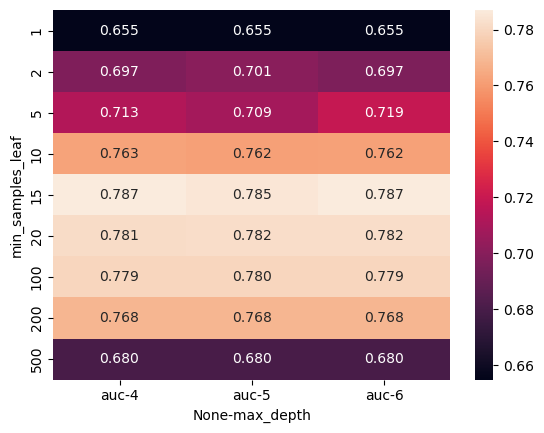

In [304]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

Here you can easily find the highest value because it's the lightest one. The darkest one is the lowest/worst value. But we have to add that this way of selecting the best parameter could be suboptimal, because it could be that max_depth of 7 or 10 or sth. else works better but we didn't try going there. That's because first we tuned the max_depth parameter and then selected the best min_samples_leaf.
For this small data set it makes sense to try more values, but if a data set is big, we cannot try every possible combination. We just need to restrict our seach space.
So it's a good order to first tune the max_depth parameter and then after that tune the other parameter.

But because of this small data set the training is fast so actually we can experiment a bit. Let's try some more combinations.

In [306]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6.0,15,0.787878
31,7.0,15,0.787762
58,20.0,15,0.787711
49,15.0,15,0.787293
13,5.0,15,0.786939


In [307]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.646  0.667  0.657  0.646  0.665  0.660  0.650  0.659
2                 0.691  0.687  0.692  0.695  0.694  0.690  0.696  0.686
5                 0.710  0.719  0.720  0.714  0.716  0.719  0.719  0.721
10                0.762  0.761  0.766  0.762  0.763  0.763  0.764  0.763
15                0.786  0.786  0.787  0.788  0.788  0.785  0.787  0.788
20                0.781  0.783  0.782  0.783  0.783  0.783  0.782  0.784
100               0.779  0.780  0.780  0.780  0.780  0.779  0.779  0.779
200               0.768  0.768  0.768  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

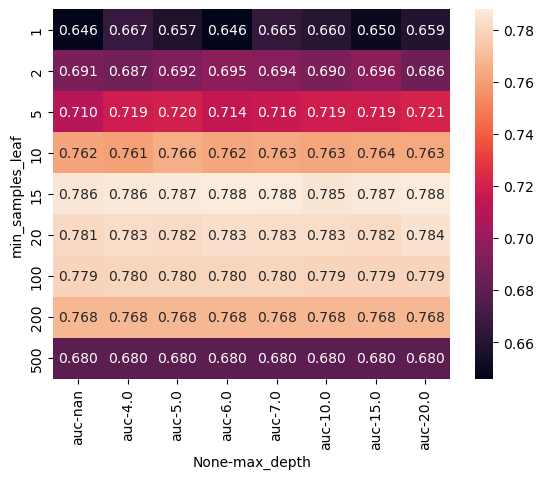

In [308]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [309]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [311]:
#print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

# 6.6 Ensemble and random forest
In this lesson we talk about random forest as a way of putting multiple decision trees together.
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

## Board of experts

What have we done so far.
A Client comes to a bank and wants to borrow some money. For that it sends an application that contains some basic information. We can extract some features from that application that can be put to the decision tree. Then the decision tree returns a score which is the probability that this customer is going to default or not. Based on that the bank can decide whether they agree to lend some money or not.
Let's imagine for a moment that we don't have the decision tree, but instead we have a board of experts (5 experts). So when somebody comes with an application we forward it to the board of experts. Each of them gets his own copy and then they independently decide based on this application whether they would agree to give the money or they would reject this application. After that the majority vote wins. If majority says yes then the bank will lend the money, if the majority says no, the application will be rejected.

The idea behind the board of experts is we think that five experts know it better than just one expert. And instead of relying on one expert we rely on five experts. This way we think the decisions we make are better.
The same idea can be applied to models, so instead of a board of five experts we can have five models (g1, g2,...,g5). Each of these models returns a probability of default. Now we can take the decisions and aggregate them by using the average ((1/n)*SUM(pi)). 

This way of aggregating multiple models can work for any model, but instead of just taking arbitrary models we take decision trees. Then in this case we have a random forest.
But wait, why random forest and not just forest. The reason for this if we just take the same application (same set of features) and we build the same bunch of trees with the same parameters, the trees will be the same.
The same trees will output exactly the same probability of default and the average will be the same. This is useless. We don't want to train the same model five times.

So what happens in a random forest?
Each of the applications/features that the trees get are a little bit different. So for example let's have 10 features in total, then each tree can get 7 out of the 10. Each tree gets a different set of features.

Let's take a smaller example with 3 features (assets, debt, and price) and let's say we train only 3 models:
- DT#1 assets, debt
- DT#2 assets, price
- DT#3 debt, price
This way we have 3 different models and what we do at the end, we compute the average score (1/3)*(p1 + p2 + p3). Because of only having 3 features we cannot really select the features randomly but in real the idea is to select randomly a set of features.

Each model gets a random subset of features.

The response will be probability of default as well.

This is the main idea behind random forest. So let's train it. To use it in scikit learn we need to import it from ensemble package.

In [312]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
# n_estimators - number of models we want to use
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.781835024581628

In [332]:
rf.predict_proba(X_val[[0]])

array([[1., 0.]])

This model is relatively good. This is as good as the best decision tree is, and we didn't do any tuning here. We just used the default values and only reduced the default value for n_estimators from 100 to 10.
But it's important to know that we have a random forest here, so when we retrain the model and do the prediction again, we'll get different results, because there is some randomization.
We can fix this while using the random_state parameter. Then no matter how many time we try the result will be always the same. This is also import for reproducibility to run the forest model.

In [333]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [334]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

Let's see what we can actually do with this random forest. First let's try to see how the model performance changes when we increase the number of estimators/models. What we can do is iterating over many different values and see how the performance improves or changes, when increasing the number of trees.

In [336]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [337]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


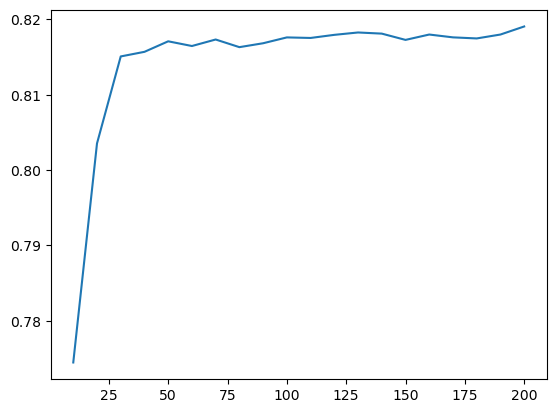

In [339]:
# x-axis - n_estimators
# y-axis - auc score
plt.plot(df_scores.n_estimators, df_scores.auc)

The performance grows up until 50 and then it stagnates, so it doesn't really grow after 50. No matter how many trees we add after 50 the performance isn't really improving. So we see that it doesn't make sense to train more trees. It's enough to just have 50.
Now we can also tune our random forest model based on what we did before because a random forest consists of multiple decision trees so the parameters we tune in random forest are the same namely we are interested in max depth parameter and min_leaf_size. Again let's start with max_depth parameter.
Now we want to train a random forest model for different depth parameters.

In [340]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [342]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


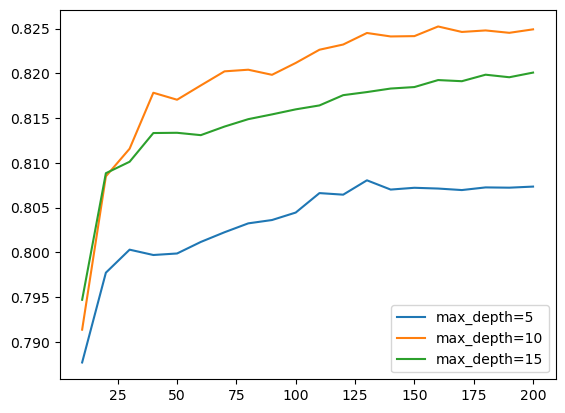

In [344]:
# Let's plot it
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

What we see here is first the plot for 10 and 15 are quite close, but then for 15 it kind of stops growing, so it grows only a little bit. For 10 it's doing a lot better, maybe around 125 it's the best one. So what we see is, that depth actually matters. We need to set a good value for that. We take the value of 10 as the best one, because the difference between 10 and 15 and between 10 and 5 is quite significant.

In [345]:
# Let's select 10 as the best value
max_depth = 10

Now we want to check what is the best value for min_leaf_size parameter. We'll do it in the same way as seen before.

In [346]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [347]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [350]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

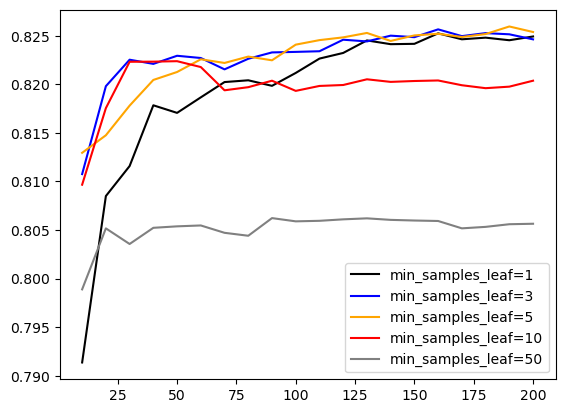

In [349]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

We see 50 is the worst one and the three best ones are 1, 3, and 5. We can go with 3 because it starts getting good performance earlier than others.

In [351]:
# Let's select 3 as the best value
min_samples_leaf = 3

Now let's retrain the model with these values.

In [354]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)

That are not the only two parameters we can tune. There are a lot more parameters
Other useful parameters:

    max_features
    --> Remember the way random forest works. It doesn't get all the features. It get's only a part of features.  
        This parameter max_features specifies how many features each decision tree actually gets during training.
    bootstrap
    --> Bootstrap is another way of randomization but on the row level. Remember we want our decision trees as 
        different as possible and bootstrap is another way of making them different from each other.
    n_jobs
    --> The process of training decision trees can be parallelized. All the models are independent from each other 
        so we can actually train them in parallel. This number of jobs says how many trees we can train in parallel.
        Default is None means that we're not training them in parallel.
        -1 means to use all available processors. This will speed up the process.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# 6.7 Gradient boosting and XGBoost
This time we talk about different way of combining decision trees when we train our models sequentially one after another and each model corrects the errors of the previous model. This way of combining models is called boosting. We are going to talk about one particular way of boosting - gradient boosting and we'll use XGBoost which is a library for implementing gradient boosted tree algorithm.
- Gradient boosting vs. random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output

## Gradient boosting vs. random forest
RF
In random forest we take a data set and then you train multiple independent decision trees on this data set. Then you combine the result into one single prediction by taking out an average for example ((1/n)*SUM(pi)). This is the final prediction.

Boosting is a different way of combining multiple models into one ensemble.
In Boosting we start with the data set and train the first model. The first model makes predictions. Then we look at this predictions and the errors that were made. Based on these errors we train another model, that makes predictions again. This model makes also some errors. Then we train a third model that corrects the errors of the second model. And we can keep repeating this. We do this for many iterations and then at the end we combine these multiple predictions into the final prediction.
This is the idea behind boosting. We sequentially train multiple models where each next model corrects the mistakes of the previous one.

## Installing XGBoost 
XGBoost is a library that has quite a good implementation of gradient boosting.

In [355]:
!pip install xgboost

In [356]:
import xgboost as xgb

## Training the first model
Next thing we have to do is, wrap the training data into a special data structure called DMatrix. This data structure is optimized for training xgboost models and allows to train faster.

In [359]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

XGBoost Parameters (xgboost.readthedocs.io/en/latest/parameter.html)
The most important parameters are:
- eta - which is the learning rate --> this is how fast the models learns
- max_depth - controls the size of the trees which is the same as in random forest and decision trees
- min_child_weight - controls how many observations we should have in a leaf node which is the same as min_samples_leaf
- objective - we have a binary classification task, so we want to classify our clients into 'defaulting' or 'non-defaulting' --> for that we need to specify 'objective'. There are many objectives also for regression problems or for classification problems
- nthread - xgboost can parallelize training --> we need to specify how many threads to use
- seed - to use randomization
- verbosity - controls what kind of warnings we get

In [364]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round= 10)

Now we want to test the model. So we can use the predict function of the xgboost model. XGBoost returns already one dimensional array with predictions.

In [365]:
y_pred = model.predict(dval)

We can then calculate the auc and see that this model has a value of almost 81% which is quite good considering that we didn't do anything else (we only use default parameters). We have to be careful how many trees we train and what's the size of this trees, because xgboost models also overfit, as we'll see later. In this case here the performance of num_boost_round=10 is quite equal to num_boost_round=200.

In [366]:
roc_auc_score(y_val, y_pred)

0.8065256351262986

## Performance monitoring
In XGBoost it's possible to monitor the performance of the training procedure. So we can see what exactly is happening at each step of the training process. What we can do is after each iteration where a new tree is trained we can immediately evaluate it on our validation data to see what are the results there.
For that purpose we can create a watchlist that contains the data sets we want to use for evaluation.

In [367]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

If we don't specify anything, it will show the error rate (logloss), which is used by xgboost to find the best parameters. This is quite technical and we'll use another metric.

In [370]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-logloss:0.49703	val-logloss:0.54305
[1]	train-logloss:0.44463	val-logloss:0.51462
[2]	train-logloss:0.40707	val-logloss:0.49896
[3]	train-logloss:0.37760	val-logloss:0.48654
[4]	train-logloss:0.35990	val-logloss:0.48007
[5]	train-logloss:0.33931	val-logloss:0.47563
[6]	train-logloss:0.32586	val-logloss:0.47413
[7]	train-logloss:0.31409	val-logloss:0.47702
[8]	train-logloss:0.29962	val-logloss:0.48205
[9]	train-logloss:0.29216	val-logloss:0.47996
[10]	train-logloss:0.28407	val-logloss:0.47969
[11]	train-logloss:0.27583	val-logloss:0.47888
[12]	train-logloss:0.27127	val-logloss:0.47697
[13]	train-logloss:0.26525	val-logloss:0.47871
[14]	train-logloss:0.25734	val-logloss:0.48096
[15]	train-logloss:0.25186	val-logloss:0.48160
[16]	train-logloss:0.24849	val-logloss:0.47982
[17]	train-logloss:0.24144	val-logloss:0.48086
[18]	train-logloss:0.23796	val-logloss:0.47978
[19]	train-logloss:0.23390	val-logloss:0.47857
[20]	train-logloss:0.22833	val-logloss:0.48036
[21]	train-logloss:0.22

[173]	train-logloss:0.03268	val-logloss:0.65431
[174]	train-logloss:0.03252	val-logloss:0.65449
[175]	train-logloss:0.03225	val-logloss:0.65630
[176]	train-logloss:0.03206	val-logloss:0.65803
[177]	train-logloss:0.03161	val-logloss:0.65926
[178]	train-logloss:0.03125	val-logloss:0.65920
[179]	train-logloss:0.03115	val-logloss:0.65979
[180]	train-logloss:0.03070	val-logloss:0.66162
[181]	train-logloss:0.03026	val-logloss:0.66381
[182]	train-logloss:0.02998	val-logloss:0.66556
[183]	train-logloss:0.02992	val-logloss:0.66591
[184]	train-logloss:0.02981	val-logloss:0.66593
[185]	train-logloss:0.02948	val-logloss:0.66711
[186]	train-logloss:0.02924	val-logloss:0.66794
[187]	train-logloss:0.02897	val-logloss:0.66820
[188]	train-logloss:0.02869	val-logloss:0.66980
[189]	train-logloss:0.02846	val-logloss:0.67095
[190]	train-logloss:0.02822	val-logloss:0.67191
[191]	train-logloss:0.02817	val-logloss:0.67229
[192]	train-logloss:0.02799	val-logloss:0.67271
[193]	train-logloss:0.02786	val-logloss:

We use auc as metric which we also used before. For that we set the parameter eval_metric to 'auc'.

In [371]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-auc:0.86730	val-auc:0.77938
[1]	train-auc:0.89140	val-auc:0.78964
[2]	train-auc:0.90699	val-auc:0.79010
[3]	train-auc:0.91677	val-auc:0.79967
[4]	train-auc:0.92246	val-auc:0.80443
[5]	train-auc:0.93086	val-auc:0.80858
[6]	train-auc:0.93675	val-auc:0.80981
[7]	train-auc:0.94108	val-auc:0.80872
[8]	train-auc:0.94809	val-auc:0.80456
[9]	train-auc:0.95100	val-auc:0.80653
[10]	train-auc:0.95447	val-auc:0.80851
[11]	train-auc:0.95672	val-auc:0.81052
[12]	train-auc:0.95818	val-auc:0.81389
[13]	train-auc:0.96071	val-auc:0.81270
[14]	train-auc:0.96333	val-auc:0.81265
[15]	train-auc:0.96554	val-auc:0.81334
[16]	train-auc:0.96669	val-auc:0.81510
[17]	train-auc:0.96951	val-auc:0.81573
[18]	train-auc:0.97113	val-auc:0.81667
[19]	train-auc:0.97261	val-auc:0.81811
[20]	train-auc:0.97464	val-auc:0.81729
[21]	train-auc:0.97560	val-auc:0.81780
[22]	train-auc:0.97653	val-auc:0.81656
[23]	train-auc:0.97773	val-auc:0.81636
[24]	train-auc:0.97809	val-auc:0.81613
[25]	train-auc:0.97953	val-auc:0.81

You see that AUC on training data goes to one, but on validation data the performance doesn't really improve. It stagnates around 80%. It seems the model overfits.
Using this output is not very convenient, so going through this is a bit difficult. It would be nice to be able to plot it. To not print every epoch we can use 'verbose_eval=5' to just output each 5th epoch.

In [372]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

When you're interested to see this on a plot the problem with xgboost is that it's not easy to extract this information, because the information are printed just to standard output.
But there is a way in Jupyter Notebook to capture whatever is printed to standard output and then do whatever you want with this information. For that you can use the command "%%capture output". It captures everything what the code outputs to a string. It's not really a string but special object that we can use to get the content out.
This time we see that something is happening but we cannot see anything because output is captured.

In [373]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [375]:
s = output.stdout
s
# Output:
# '[0]\ttrain-auc:0.86730\tval-auc:0.77938\n[5]\ttrain-auc:0.93086\tval-auc:0.80858\n[10]\ttrain-auc:0.95447\tval-auc:0.80851\n[15]\ttrain-auc:0.96554\tval-auc:0.81334\n[20]\ttrain-auc:0.97464\tval-auc:0.81729\n[25]\ttrain-auc:0.97953\tval-auc:0.81686\n[30]\ttrain-auc:0.98579\tval-auc:0.81543\n[35]\ttrain-auc:0.99011\tval-auc:0.81206\n[40]\ttrain-auc:0.99421\tval-auc:0.80922\n[45]\ttrain-auc:0.99548\tval-auc:0.80842\n[50]\ttrain-auc:0.99653\tval-auc:0.80918\n[55]\ttrain-auc:0.99765\tval-auc:0.81114\n[60]\ttrain-auc:0.99817\tval-auc:0.81172\n[65]\ttrain-auc:0.99887\tval-auc:0.80798\n[70]\ttrain-auc:0.99934\tval-auc:0.80870\n[75]\ttrain-auc:0.99965\tval-auc:0.80555\n[80]\ttrain-auc:0.99979\tval-auc:0.80549\n[85]\ttrain-auc:0.99988\tval-auc:0.80374\n[90]\ttrain-auc:0.99993\tval-auc:0.80409\n[95]\ttrain-auc:0.99996\tval-auc:0.80548\n[100]\ttrain-auc:0.99998\tval-auc:0.80509\n[105]\ttrain-auc:0.99999\tval-auc:0.80629\n[110]\ttrain-auc:1.00000\tval-auc:0.80637\n[115]\ttrain-auc:1.00000\tval-auc:0.80494\n[120]\ttrain-auc:1.00000\tval-auc:0.80574\n[125]\ttrain-auc:1.00000\tval-auc:0.80727\n[130]\ttrain-auc:1.00000\tval-auc:0.80746\n[135]\ttrain-auc:1.00000\tval-auc:0.80753\n[140]\ttrain-auc:1.00000\tval-auc:0.80899\n[145]\ttrain-auc:1.00000\tval-auc:0.80733\n[150]\ttrain-auc:1.00000\tval-auc:0.80841\n[155]\ttrain-auc:1.00000\tval-auc:0.80734\n[160]\ttrain-auc:1.00000\tval-auc:0.80711\n[165]\ttrain-auc:1.00000\tval-auc:0.80707\n[170]\ttrain-auc:1.00000\tval-auc:0.80734\n[175]\ttrain-auc:1.00000\tval-auc:0.80704\n[180]\ttrain-auc:1.00000\tval-auc:0.80723\n[185]\ttrain-auc:1.00000\tval-auc:0.80678\n[190]\ttrain-auc:1.00000\tval-auc:0.80672\n[195]\ttrain-auc:1.00000\tval-auc:0.80708\n[199]\ttrain-auc:1.00000\tval-auc:0.80725\n'
print(s)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

Now we have everything in a string and can parse this to extract the information.
First step is to split each line by using new line operator '\n'. The result is a string per each line.

In [376]:
s.split('\n')

['[0]\ttrain-auc:0.86730\tval-auc:0.77938',
 '[5]\ttrain-auc:0.93086\tval-auc:0.80858',
 '[10]\ttrain-auc:0.95447\tval-auc:0.80851',
 '[15]\ttrain-auc:0.96554\tval-auc:0.81334',
 '[20]\ttrain-auc:0.97464\tval-auc:0.81729',
 '[25]\ttrain-auc:0.97953\tval-auc:0.81686',
 '[30]\ttrain-auc:0.98579\tval-auc:0.81543',
 '[35]\ttrain-auc:0.99011\tval-auc:0.81206',
 '[40]\ttrain-auc:0.99421\tval-auc:0.80922',
 '[45]\ttrain-auc:0.99548\tval-auc:0.80842',
 '[50]\ttrain-auc:0.99653\tval-auc:0.80918',
 '[55]\ttrain-auc:0.99765\tval-auc:0.81114',
 '[60]\ttrain-auc:0.99817\tval-auc:0.81172',
 '[65]\ttrain-auc:0.99887\tval-auc:0.80798',
 '[70]\ttrain-auc:0.99934\tval-auc:0.80870',
 '[75]\ttrain-auc:0.99965\tval-auc:0.80555',
 '[80]\ttrain-auc:0.99979\tval-auc:0.80549',
 '[85]\ttrain-auc:0.99988\tval-auc:0.80374',
 '[90]\ttrain-auc:0.99993\tval-auc:0.80409',
 '[95]\ttrain-auc:0.99996\tval-auc:0.80548',
 '[100]\ttrain-auc:0.99998\tval-auc:0.80509',
 '[105]\ttrain-auc:0.99999\tval-auc:0.80629',
 '[110]\tt

Each line consists of three components, first is the number of iteration, the second is the evaluation on the train data set, and the third is the evaluation on the validation data set. Again we can split this by using tabulator operator ('\t'). As the result we get three components separated from each other. 
Then we need to extract and set the right format (int, float, float), therefor we use the strip method and convert the string to int/float after that. The following snippet show the whole steps.

In [382]:
line = s.split('\n')[0]
line
# Output: '[0]\ttrain-auc:0.86730\tval-auc:0.77938'

line.split('\t')
# Output: ['[0]', 'train-auc:0.86730', 'val-auc:0.77938']

num_iter, train_auc, val_auc = line.split('\t')
num_iter, train_auc, val_auc
# Output: ('[0]', 'train-auc:0.86730', 'val-auc:0.77938')

int(num_iter.strip('[]'))
# Output: 0
float(train_auc.split(':')[1])
# Output: 0.8673
float(val_auc.split(':')[1])
# Output: 0.77938

0.77938

We can use all this steps and bring them together to turn all the information (number of iteration, auc on train, and auc on validation data) from output into a dataframe. The next snipped implemented all the steps into one function that we can use. Then we can plot this and do some analysis.

In [384]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [385]:
# Let's see how the function works.
df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729
5,25,0.97953,0.81686
6,30,0.98579,0.81543
7,35,0.99011,0.81206
8,40,0.99421,0.80922
9,45,0.99548,0.80842


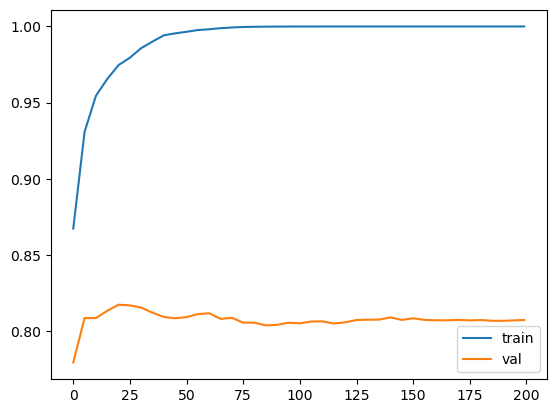

In [386]:
# x-axis - number of iterations
# y-axis - auc
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

We can see, the auc on train is always growing. For the validation it's different. The curve reaches it's peak earlier and then it declines and stagnates. There is where overfitting starts. When we plot only auc on validation it's easier to see that the performance declines (while the auc on train stays at 1.0).

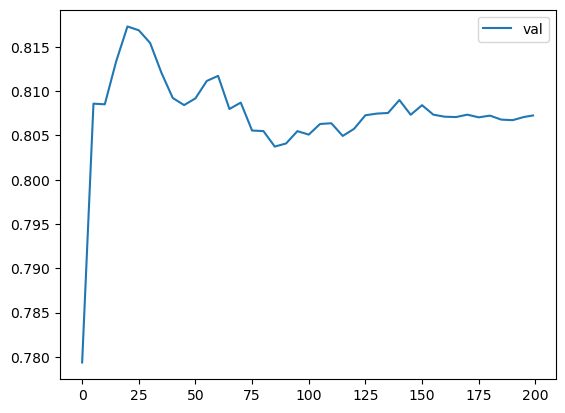

In [387]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# 6.8 XGBoost parameter tuning
Tuning the following parameters in this order
- eta - learning rate
- max_depth
- min_child_weight

## Tuning eta 
Eta is also called learning rate. Eta says how much weight the following model has when it's correcting the results of the previous model.
If the weight is 1.0 then all the new predictions are used to correct the results of the previous predictions.
If the weight is 0.3 then instead of adding these predictions 100%, we use only 30%. Here we're moving in smaller steps.
So you can say eta controls the size of steps.
Now we'll see how different values of eta affects the model performance.
For that purpose we create first a dictionary called 'scores' so that we can add the scores for each value of eta.

In [388]:
scores = {}

In [389]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

We want to have keys that looks like 'eta=0.3' to use it as a key in the scores dictionary.

In [390]:
'eta=%s' % (xgb_params['eta'])
# Output: 'eta=0.3'

'eta=0.3'

In [392]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

Now the dictionary contains the dataframe for this eta.

In [393]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.86730  0.77938
 1          5    0.93086  0.80858
 2         10    0.95447  0.80851
 3         15    0.96554  0.81334
 4         20    0.97464  0.81729
 5         25    0.97953  0.81686
 6         30    0.98579  0.81543
 7         35    0.99011  0.81206
 8         40    0.99421  0.80922
 9         45    0.99548  0.80842
 10        50    0.99653  0.80918
 11        55    0.99765  0.81114
 12        60    0.99817  0.81172
 13        65    0.99887  0.80798
 14        70    0.99934  0.80870
 15        75    0.99965  0.80555
 16        80    0.99979  0.80549
 17        85    0.99988  0.80374
 18        90    0.99993  0.80409
 19        95    0.99996  0.80548
 20       100    0.99998  0.80509
 21       105    0.99999  0.80629
 22       110    1.00000  0.80637
 23       115    1.00000  0.80494
 24       120    1.00000  0.80574
 25       125    1.00000  0.80727
 26       130    1.00000  0.80746
 27       135    1.00000  0.80753
 28

In [394]:
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729
5,25,0.97953,0.81686
6,30,0.98579,0.81543
7,35,0.99011,0.81206
8,40,0.99421,0.80922
9,45,0.99548,0.80842


### Eta = 1.0 

Now let's change this eta to 1.0 which is the maximum value we can have.

In [395]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [396]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

Now the scores dictionary should have to two values and two keys.

In [397]:
scores['eta=1.0']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.95857,0.79136
2,10,0.98061,0.78355
3,15,0.99549,0.78050
4,20,0.99894,0.78591
5,25,0.99989,0.78401
6,30,1.00000,0.78371
7,35,1.00000,0.78234
8,40,1.00000,0.78184
9,45,1.00000,0.77963


### Eta = 0.1

In [398]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [399]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [400]:
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.90325,0.79290
2,10,0.91874,0.80510
3,15,0.93126,0.81380
4,20,0.93873,0.81804
5,25,0.94638,0.82065
6,30,0.95338,0.82063
7,35,0.95874,0.82404
8,40,0.96325,0.82644
9,45,0.96694,0.82602


### Eta = 0.05 

In [401]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [402]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [403]:
scores['eta=0.05']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.88650,0.79584
2,10,0.90368,0.79623
3,15,0.91072,0.79938
4,20,0.91774,0.80510
5,25,0.92385,0.80895
6,30,0.92987,0.81175
7,35,0.93379,0.81480
8,40,0.93856,0.81547
9,45,0.94316,0.81807


### Eta = 0.01 

In [405]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [406]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [407]:
scores['eta=0.01']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.87157,0.77925
2,10,0.87247,0.78051
3,15,0.87541,0.78302
4,20,0.87584,0.78707
5,25,0.88406,0.79331
6,30,0.89027,0.79763
7,35,0.89559,0.79914
8,40,0.89782,0.79883
9,45,0.89983,0.79845


Now we inserted some key value pairs. We can see what are the keys in the dictionary.

In [408]:
scores.keys()
# Output: dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

So now we have all the dataframes with scores. Let's plot them.

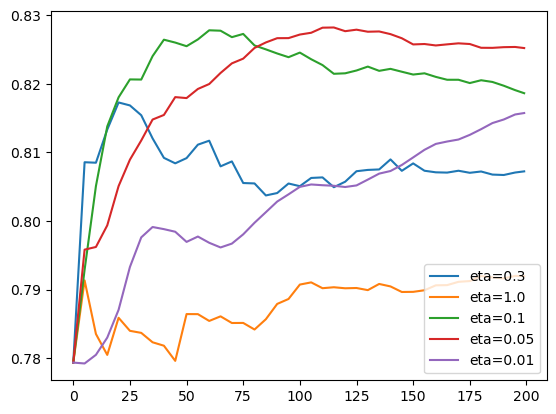

In [409]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

Let's plot only a few of them - first eta=1.0, eta=0.3, and eta=0.1

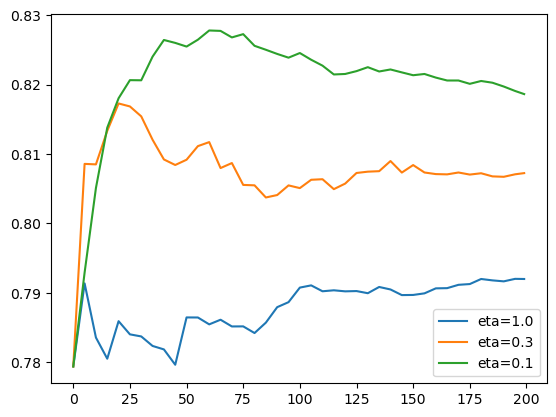

In [410]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

This plot is a bit easier to read. What we see is that 1.0 is worst. Very fast it reaches the top performance and then it drops and stays at a bad level.
Next one is 0.3 that has auc that is quite ok until iteration 25 and then it goes down.
In case of 0.1 the curve grows slower and reaches the peak later and then it starts to decline.
This is exactly what learning rate is about. You can see how fast the model learns but also how large the steps are that the model takes with each new iteration. If the steps are too large the model learn something quite fast but then it starts to degrade because the steps are too large. That means it starts overfitting.
A smaller learning rate means that it learns slower but better. And when such a model starts degrading it also doesn't overfit as fast as models with higher learning rate.

Let's also look at eta=0.3, eta=0.1, and eta=0.01

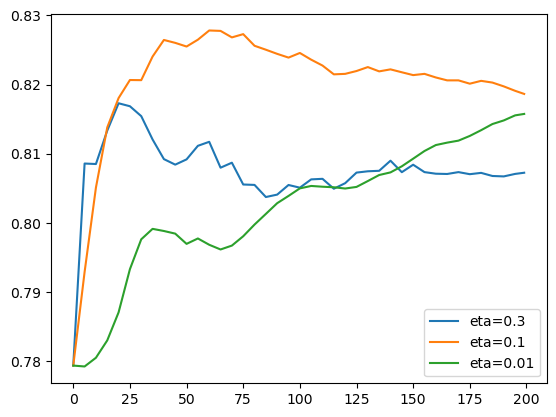

In [411]:
etas = ['eta=0.3', 'eta=0.1', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

For 0.01 the graph is growing very slow - it learns very slowly. We don't know how much time it needs to have a better performance that the other model (orange). This model needs too many iterations - it takes forever to learn, because the steps are too tiny.
For 0.3 it takes a few big steps right but then it also starts overfitting faster.
Here in this plot eta=0.1 is maybe the best one with the sweet spot between 50 and 75 iterations. It needs a little bit longer but therefor the performance is better.

There was also eta=0.05 let's finally look also at this plot.

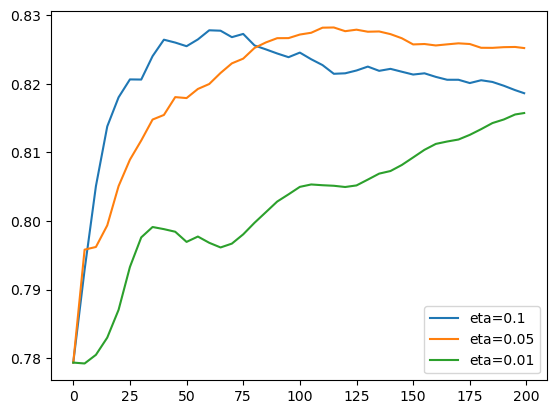

In [412]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

The model of eta=0.05 takes approximately two times more iterations to converge comparing to the blue model (eta=0.1). The model (eta=0.05) takes smaller steps, needs more time and at the end the result is still worse than the blue model. So we can say the model with eta=0.1 seems the best, because it needs less steps for a better performance at all.

## Tuning max_depth 
Now we set the eta to 0.1 and start tuning the max_depth parameter. Therefor we need to reset our scores dictionary to keep only the new experiments. First we train a model with the same parameters than before. We use this model as baseline for comparing different 'max_depth' values.

In [413]:
scores = {}

In [414]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [415]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

###  max_depth=3

In [416]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [417]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

###  max_depth=4

In [419]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [420]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

### max_depth=10 

In [421]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [422]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

### Plotting max_depth

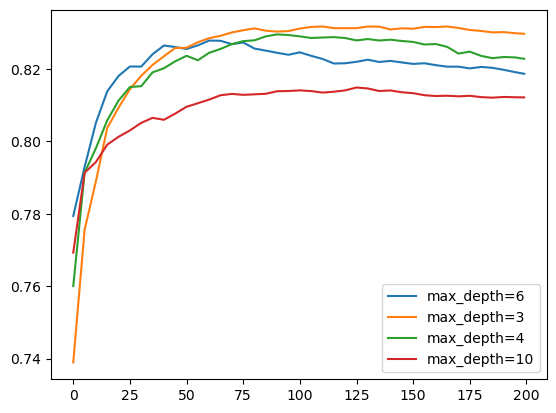

In [424]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

#plt.ylim(0.8, 0.84)
plt.legend()

We see the depth of 10 is worst. So we can delete it.

In [ ]:
del scores['max_depth=10']

To get a better view on the y-area between 0.8 and 0.84 we can limit the plot as shown in the next snippet.

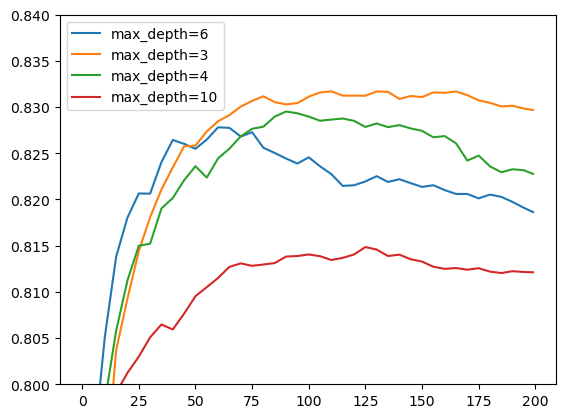

In [425]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

max_depth = 6 is the second worst. We conclude that max_depth of 3 is the best depth for us.

## Tuning min_child_weight

Now we set the eta to 0.1 and max_depth to 3. Now we start tuning the last parameter which is min_child_weight.
Therefor we need to reset our scores dictionary again to keep only the new experiments. First we train a model with the same parameters than before but set min_child_weight to 1. We use this model as baseline for comparing different 'min_child_weight' values.

In [427]:
scores = {}

In [428]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [429]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

### min_child_weight=10 

In [430]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [431]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

### min_child_weight=30  

In [432]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [433]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

This should give us an idea if we actually need to increase this value or not.

### Plotting min_child_weight

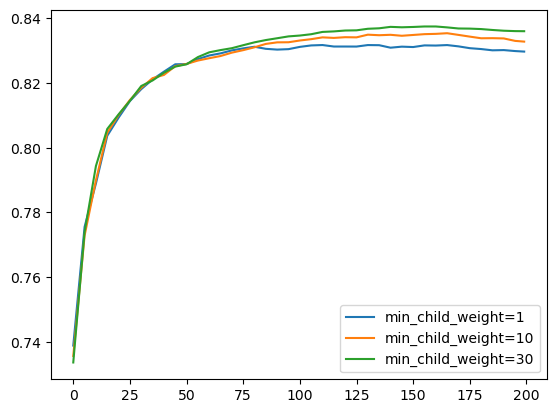

In [436]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()

Here it's hard to see which one is the best. We should also enlarge it a bit.

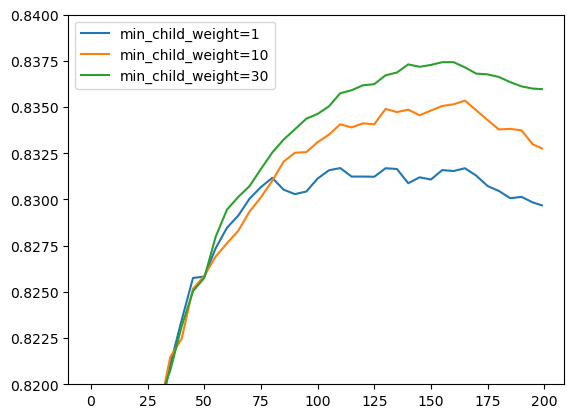

In [437]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)
plt.legend()

This plot looks a bit different than in the video. Here min_child_weight of 30 seems to be the best value. In the video it's the value of 1. In this case I would go with 30 but to be equal to the video we take 1.

## Train final model 

To train the final model we need to know for how many iterations we want to train. In the video Alexey choose 175.

In [438]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

Fun Fact: In real Alexey trains a model with this parameters. So he sets min_child_weight to 30. Exactly the same what I would do regarding my plots.

In [439]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

Maybe doing always all these plots is not necessary. You can also look at the raw output and use pen and paper or Excel spreadsheet when experimenting. You have to try and see what works best for you.
Eta, max_depth, and min_child_weight are important parameters but there are other useful parameters.

Other parameters: https://xgboost.readthedocs.io/en/latest/parameter.html

Useful ones:

    subsample and colsample_bytree are similar
    
- colsample_bytree
--> (similar to what we see in RF, here it controls how many features each tree at 
    each iteration gets to see - the max is 1.0 you can try with 0.3 and 0.6 and then take some values around)
    
- subsample
--> instead of sampling colums we're sampling rows - so instead of getting all the training data we can set to 0.5 to provide only 50% of training data and we randomly select this 50%

    lambda and alpha
    
There are a lot of information about rules of thumbs for tuning xgboost parameters. Kaggle is probably the best resource. There are many tutorials on tuning xgboost parameters.

# 6.9 Selecting the final model
- Choosing between xgboost, random forest and decision tree
- Training the final model
- Saving the model

## Choosing between xgboost, random forest and decision tree 

### Retrain the best model of each type

Let's retrain the best Decision Tree model we had.

In [440]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

Let's retrain the best Random Forest model we had.

In [441]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

Let's retrain the best XGBoost model we had.

In [442]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [ ]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

### Evaluate all the best of models on validation data

In [443]:
# Decision Tree
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7850954203095104

In [444]:
# Random Forest
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [445]:
# XGBoost Model
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8309347073212081

We see that the xgboost model has the best auc score. We'll use this to train the final model.

## Training the final model 

For training the final model we want to use the entire dataset. After training we want to evaluate the final model on our test data set.

In [446]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3536,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
3866,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
1293,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
4023,ok,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3775,ok,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999


In [447]:
# First reset the index
df_full_train = df_full_train.reset_index(drop=True)

In [450]:
# Next step is getting the y
y_full_train = (df_full_train.status == 'default').astype(int).values
y_full_train
# Output: array([0, 1, 0, ..., 0, 0, 1])

array([0, 1, 0, ..., 0, 0, 1])

In [451]:
# delete status column from our dataframe
del df_full_train['status']

In [452]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [457]:
feature_names = list(dv.get_feature_names_out())
feature_names

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [458]:
feature_names = list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=feature_names)

# We don't need labels here because we'll evaluate this outside of xgboost.
# We'll use Scikit-Learn instead.
dtest = xgb.DMatrix(X_test, feature_names=feature_names)

Now let's get the parameters and train the final model.

In [459]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

### Evaluate the final model

In [460]:
y_pred = model.predict(dtest)

In [461]:
roc_auc_score(y_test, y_pred)

0.8289367577342261

The performance of the final model is a little bit worse than the best xgboost model (0.8309347073212081), but it's only like a fraction of one percent. So this is fine. We can conclude that our model didn't overfit. The final model generalizes quite well on unseen data. XGBoost models are often one of the best models at least for tabular data (dataframe with features). The downside of this is that xgboost models are more complex, it's more difficult to tune, it has more parameters, and it's easier to overfit with xgboost. But you can get a better performance out of this.

# 6.10 Summary
- Decision trees learn if-then-else rules from data.
- Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group
- Random forest is a way of combining multiple decision trees. It should have a diverse set of models to make good predictions
- Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting.

# 6.11 Explore more
- For this dataset we didn't do EDA or feature engineering. You can do it to get more insights into the problem
- For random forest, there are more parameters that we can tune. Check max_features and bootstrap
- There's a variation of random forest called "extremely randomized trees", or "extra trees". Instead of selecting the best split among all possible thresholds, it selects a few thresholds randomly and picks the best one among them. Because of that extra trees never overfit. In Scikit-Learn, they are implemented in ExtraTreesClassifier. Try it for this project.
- XGBoost can deal with NAs - we don't have to do fillna for it. Check it not filling NA's help improve performance.
- Experiment with other XGBoost parameters: subsample and colsample_bytree.
- When selecting the best split, decision trees find the most useful features. This information can be used for under standing which features are more important than others. See example here for random forest (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) (it's the same for plain decision trees) and for xgboost (https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost)
- Trees can also be used for solving the regression problems: check DecisionTreeRegressor, RandomForestRegressor and the objective=reg:squarederror parameter for XGBoost.